# Linear Regression

In [67]:
# Import modules
import traceback
import math
import pandas as pd
import numpy as np
import scipy
import scipy.linalg as LA
import matplotlib.pyplot as plt

In [52]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'

## Least-Squares fit of a straight line
* Using the model:


$y = a_0 + a_1 x$


* The slope and intercept producing the best fit can be found using:


$a_1 = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-(\bar{x})^2}$


$a_0 = \bar{y} - a_1\bar{x}$


## Quantification of Error
* Recal for a straight line, the sum of the squares of the estimate residuals:


$S_r = \sum_{i=1}^{n}e_i^2 = \sum_{i=1}^{n}(y_i - a_0 - a_1 x_i)^2$

## Coefficient of Determination
* The coefficient of determination r2 is the difference between the sum of the squares of the data residuals and the sum of the squares of the estimate residuals, normalized by the sum of the squares of the data residuals:


$r^2 = \frac{S_t - S_r}{S_t}$


* $r^2$ represents the percentage of the original uncertainty explained by the model.
* For a perfect fit, $S_r = 0$ and $r^2 = 1$.
* If $r^2 = 0$, there is no improvement over simply picking the mean.

In [4]:
def find_slope(x, y):
    xy = x * y
    x2 = x ** 2
    return (xy.mean() - (x.mean() * y.mean())) / (x2.mean() - (x.mean() ** 2))

def find_intercept(x, y):
    slope = find_slope(x, y)
    return y.mean() - (slope * x.mean())

def find_sr(x, y):
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    sum_error = 0
    for i in range(x.size):
        sum_error += math.pow(y[i] - ((slope * x[i]) + intercept), 2)
    return sum_error

def find_st(y):
    sum_st = 0
    for i in range(y.size):
        sum_st += math.pow((y[i] - y.mean()), 2)
    return sum_st

def find_r2(x, y):
    st = find_st(y)
    sr = find_sr(x, y)
    return (st - sr) / st

def linregress(x, y):
    slope = find_slope(x, y)
    intercept = find_slope(x, y)
    sr = find_sr(x, y)
    r2 = find_r2(x, y)
    return slope, intercept, sr, r2

In [5]:
def linear_regression(x, y):
    reg = []
    slope = find_slope(x, y)
    intercept = find_intercept(x, y)
    for i in range(x.size):
        reg.append(slope * x[i] + intercept)
    return reg

### Example Data

In [6]:
x, y = np.loadtxt("test_stat1_6.csv")

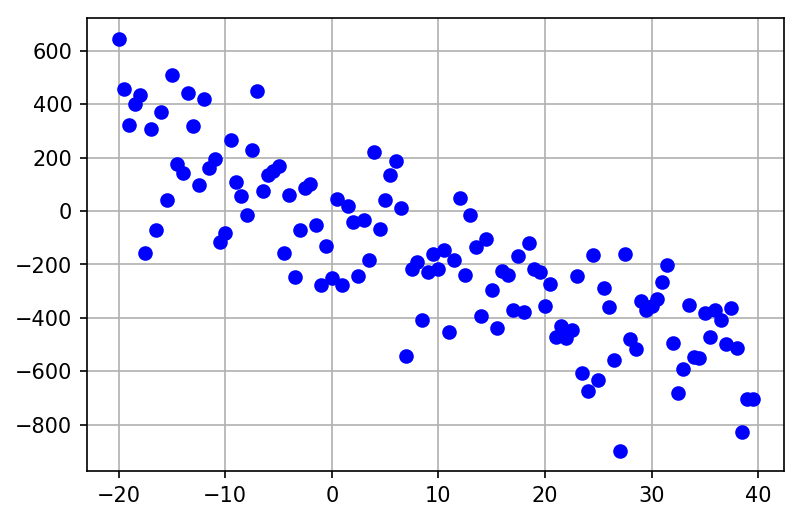

In [11]:
fig1, = plt.plot(x, y, 'o', color='b')
plt.grid(True)
plt.show()

In [9]:
slope, intercept, sr, r2 = linregress(x, y)
print("%.3f" %slope)
print("%.3f" %intercept)
print("%.3f" %sr)
print("%.3f" %r2)

-15.075
-15.075
3516551.164
0.699


$Slope = -15.075$  
$y-intercept = -12.009$  
$S_r = 3,516,551.164$  
$r^2 = 0.69$  

In [10]:
linear = linear_regression(x, y)

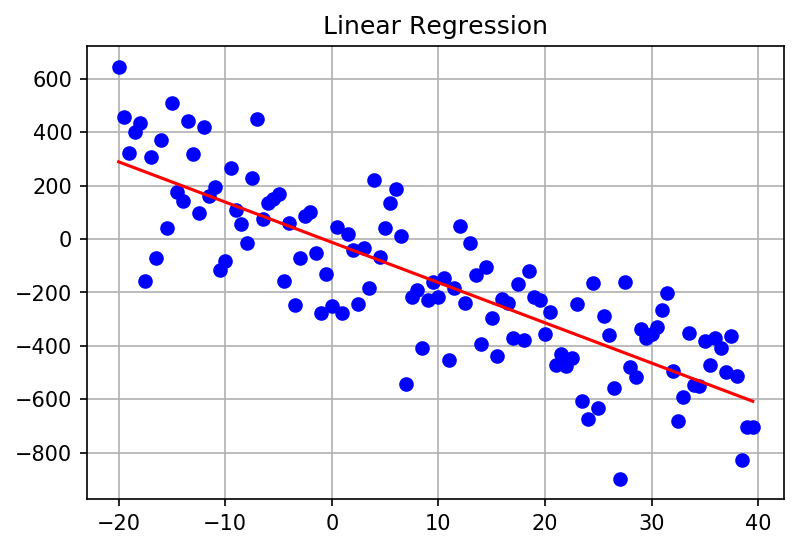

In [12]:
fig2, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, linear, color='r')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

# Non-Linear Regression
 * Linear regression is predicated on the fact that the relationship between the dependent and independent variables is linear - this is not always the case.
 * Three common examples are:

 
1. exponential


$y = \alpha_1 e^{\beta_1 x}$


2. power


$y = \alpha_2 x^{\beta_2}$


3. saturation growth rate


$y = \alpha_3 \frac{x}{\beta_3 + x}$

## Linearization of Nonlinear Relationships
* One option for finding the coefficients for a nonlinear fit is to linearize it. For the three common models, this may involve taking logarithms or inversion:

### Nonlinear
1. exponential


$y = \alpha_1 e^{\beta_1 x}$  


2. power


$y = \alpha_2 x^{\beta_2}$


3. saturation growth rate


$y = \alpha_3 \frac{x}{\beta_3 + x}$

### Linearized
1. exponential


$\ln y = \ln \alpha_1+\beta_1 x$  


2. power


$\log y = \log \alpha_2+\beta_2 \log x$


3. saturation growth rate


$\frac{1}{y} = \frac{1}{\alpha_3}+\frac{\beta_3}{\alpha_3}\frac{1}{x}$

In [112]:
def linearlized(x, y):
    z = 1 / y
    w = 1 / x
    return w, z

def find_slope(w, z):
    wz = w * z
    w2 = w ** 2
    return (wz.mean() - (w.mean() * z.mean())) / (w2.mean() - (w.mean() ** 2))

def find_intercept(w, z):
    slope = find_slope(w, z)
    return z.mean() - (slope * w.mean())

def find_sr_power(x, y):
    alpha = 1 / find_intercept(x, y)
    beta = find_slope(x, y) * alpha
    sum_error = 0
    for i in range(x.size):
        sum_error += math.pow(y[i] - (alpha * (x[i] / (beta + x[i]))), 2)
    return sum_error

def find_sr_saturation(w, z):
    alpha = 1 / find_intercept(w, z)
    beta = find_slope(w, z) * alpha
    sum_error = 0
    for i in range(w.size):
        sum_error += math.pow(z[i] - (alpha * (z[i] / (beta + z[i]))), 2)
    return sum_error

def find_st(z):
    sum_st = 0
    for i in range(z.size):
        sum_st += math.pow((z[i] - z.mean()), 2)
    return sum_st

def find_r2(w, z):
    st = find_st(z)
    sr = find_sr(w, z)
    return (st - sr) / st

def saturation_regress(w, z):
    a1 = find_slope(w, z)
    a0 = find_intercept(w, z)
    alpha = 1 / a0
    beta = a1 * alpha
    sr = find_sr_saturation(w, z)
    r2 = find_r2(w, z)
    return alpha, beta, sr, r2

In [102]:
def power_regression(x, y):
    reg = []
    z = np.log(y)
    w = np.log(x)
    a1 = find_slope(w, z)
    a0 = find_intercept(w, z)
    alpha = 10 ** a0
    beta = a1
    for i in range(x.size):
        reg.append(alpha * (x[i] ** beta ))
    return reg

def saturation_growth_regression(x, y):
    reg = []
    z = 1 / y
    w = 1 / x
    a1 = find_slope(w, z)
    a0 = find_intercept(w, z)
    alpha = 1 / a0
    beta = a1 * alpha
    for i in range(x.size):
        reg.append(alpha * (x[i] / (beta + x[i])))
    return reg

### Example Data

In [141]:
x, y = np.loadtxt("test_stat2_40.csv")
y = y * (-1)

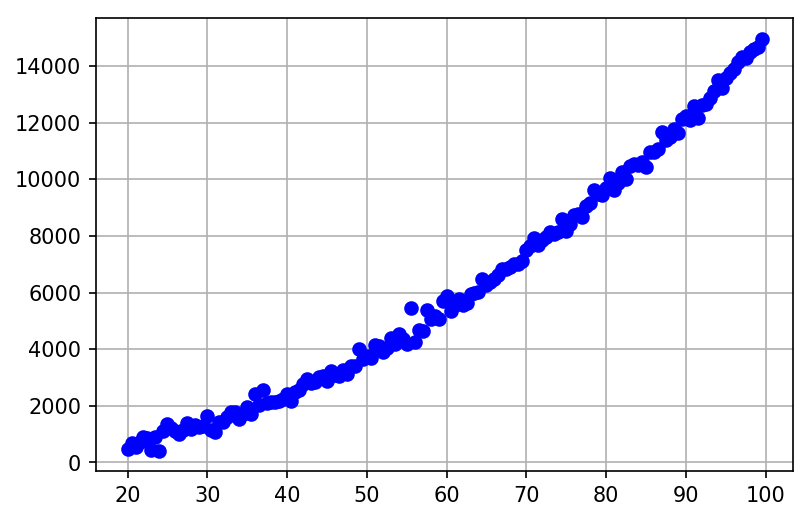

In [142]:
fig3, = plt.plot(x, y, 'o', color='b')
plt.grid(True)
plt.show()

In [143]:
w, z = linearlized(x, y)
alpha, beta, sr, r2 = saturation_regress(w, z)
print("alpha %.3f" % alpha)
print("beta %.3f" % beta)
print("sr %.3f" % sr)
print("r2 %.3f" % r2)

alpha -2473.961
beta -91.852
sr 0.030
r2 0.831


In [144]:
power = power_regression(x, y)

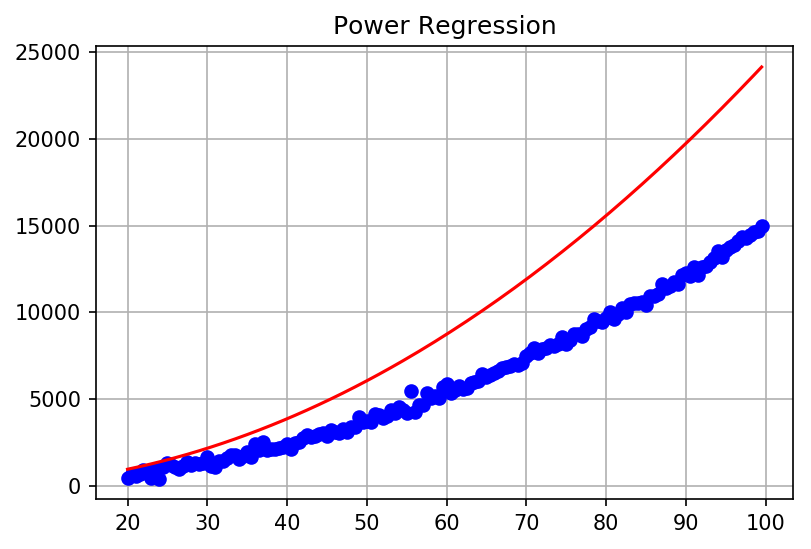

In [147]:
fig4, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, power, color='r')
plt.title('Power Regression')
plt.grid(True)
plt.show()

In [148]:
x, y = np.loadtxt("test_stat2_6.csv")

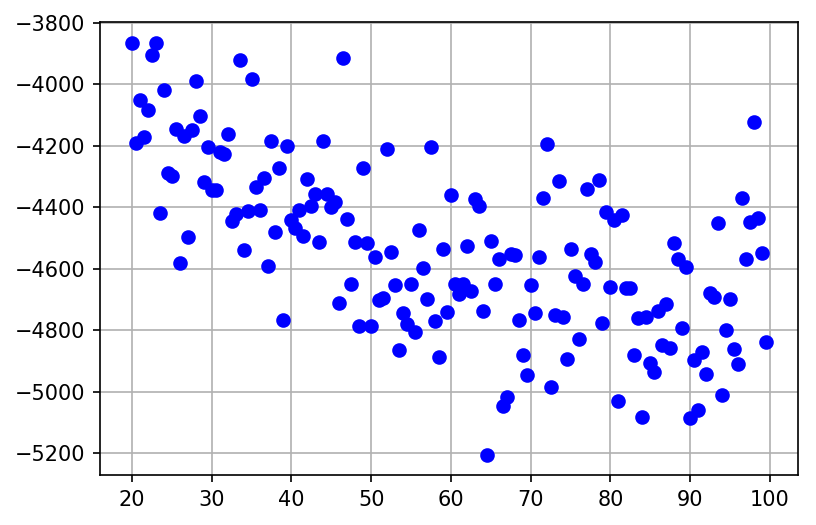

In [149]:
fig5, = plt.plot(x, y, 'o', color='b')
plt.grid(True)
plt.show()

In [150]:
w, z = linearlized(x, y)
alpha, beta, sr, r2 = saturation_regress(w, z)
print("alpha %.3f" % alpha)
print("beta %.3f" % beta)
print("sr %.3f" % sr)
print("r2 %.3f" % r2)

alpha -4962.778
beta 4.849
sr 8.256
r2 0.474


$\alpha = -4962.778$  
$\beta = 4.849$  
$S_r = 84009.027$  
$r^2 = 0.474$  

In [151]:
saturation = saturation_growth_regression(x, y)

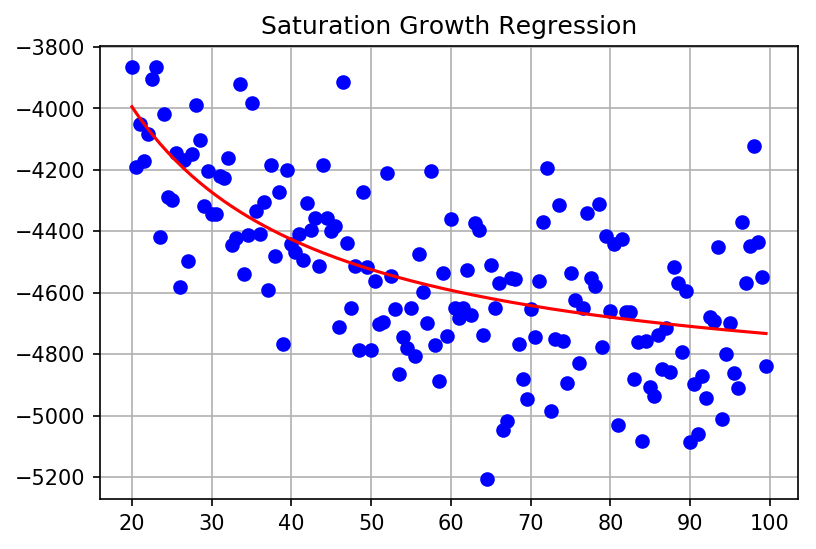

In [152]:
fig6, = plt.plot(x, y, 'o', color='b')
reg, = plt.plot(x, saturation, color='r')
plt.title('Saturation Growth Regression')
plt.grid(True)
plt.show()